In [2]:
import cv2
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

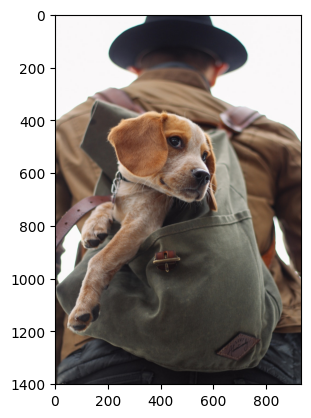

In [4]:
plt.imshow(img1)

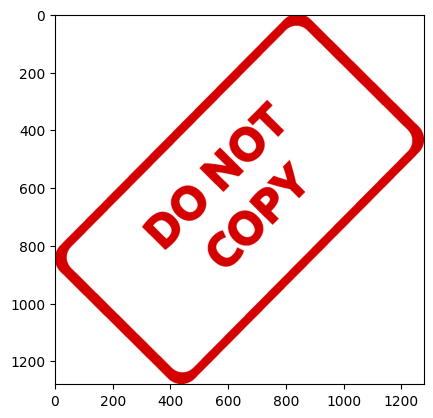

In [5]:
plt.imshow(img2)

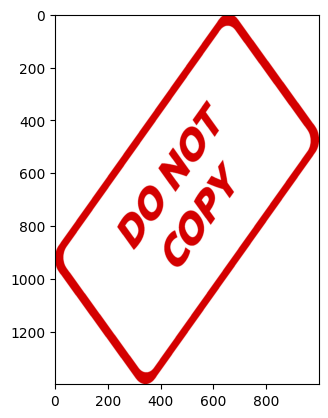

In [6]:
img2resized = cv2.resize(img2,(1000,1400))
plt.imshow(img2resized)

In [7]:
img1.shape

(1401, 934, 3)

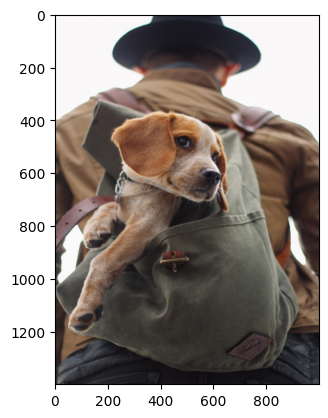

In [8]:
img1resized = cv2.resize(img1,(1000,1400))
plt.imshow(img1resized)

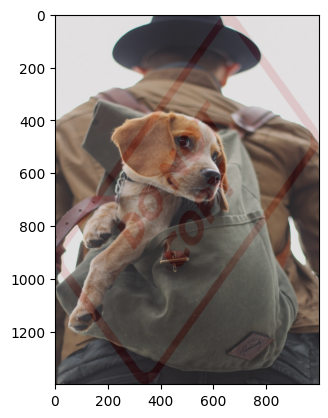

In [9]:
blended = cv2.addWeighted(src1=img1resized,alpha=0.8,src2= img2resized,beta=0.1 ,gamma =0)
plt.imshow(blended)

In [10]:
#blending for same size

In [11]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(600,600))

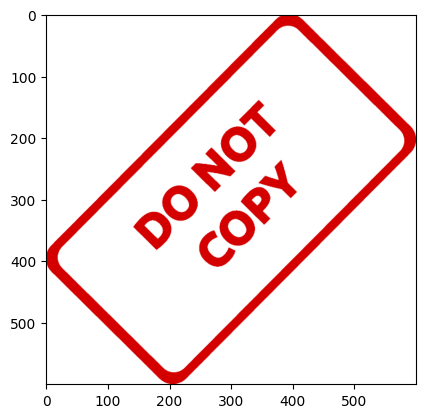

In [12]:
plt.imshow(img2)

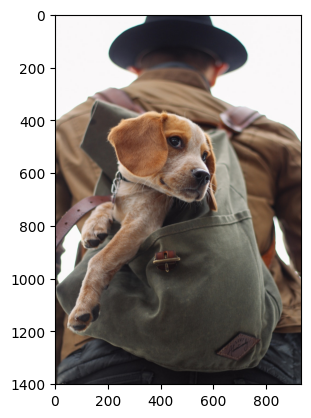

In [13]:
plt.imshow(img1)

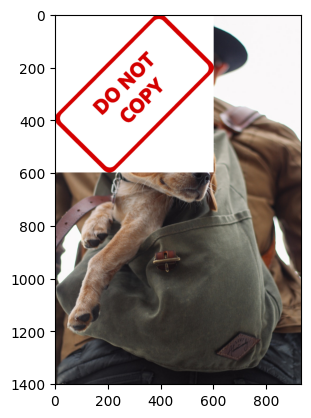

In [14]:
large_img = img1
small_img = img2
x_offset = 0
y_offset = 0
x_end=x_offset+small_img.shape[1]
y_end= y_offset+small_img.shape[0]
large_img[y_offset:y_end,x_offset:x_end] = small_img
plt.imshow(large_img)

## Blend together images of different sizes

In [15]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(600,600))

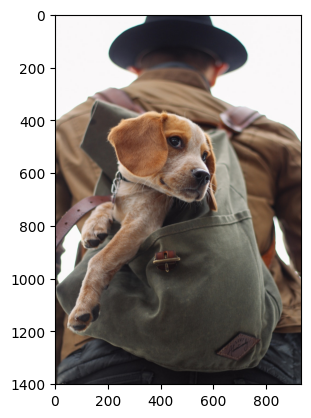

In [16]:
plt.imshow(img1)

In [17]:
img1.shape

(1401, 934, 3)

In [24]:
x_offset = 934-600
y_offset = 1401-600


In [25]:
img2.shape

(600, 600, 3)

In [26]:
rows,cols,channels = img2.shape

In [27]:
rows

600

In [28]:
cols

600

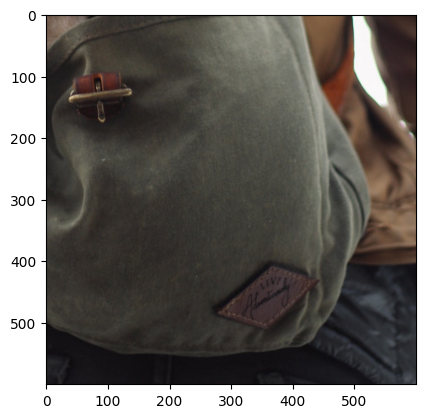

In [29]:
roi = img1[y_offset:1401,x_offset:943]
plt.imshow(roi)

In [30]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

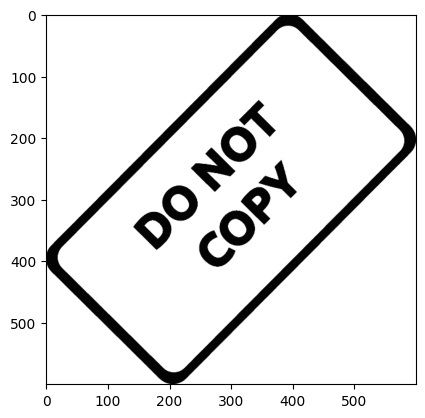

In [31]:
plt.imshow(img2gray,cmap="gray")

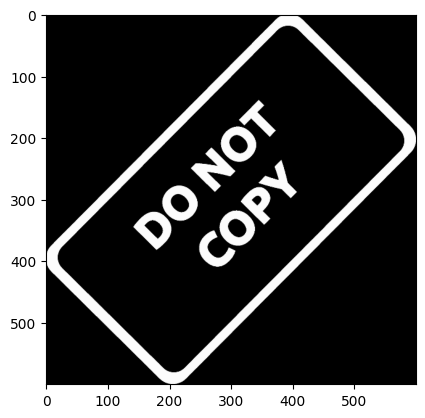

In [33]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap="gray")

In [34]:
white_backgorund = np.full(img2.shape,255,dtype=np.uint8)

In [35]:
white_backgorund.shape

(600, 600, 3)

In [36]:
white_backgorund

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [37]:
#background
bk = cv2.bitwise_or(white_backgorund,white_backgorund,mask= mask_inv)

In [38]:
bk.shape

(600, 600, 3)

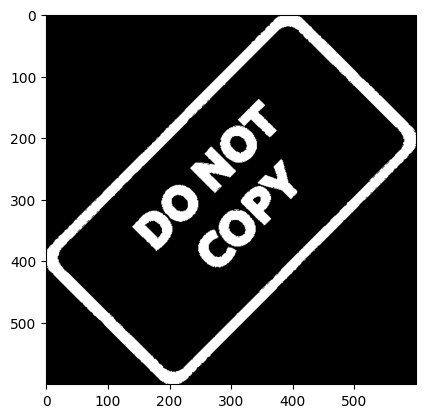

In [39]:
plt.imshow(bk)

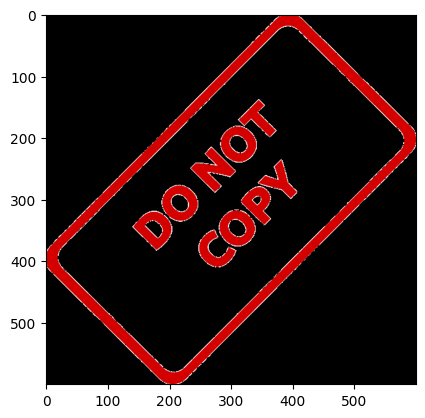

In [40]:
fg = cv2.bitwise_or(img2,img2,mask = mask_inv)
plt.imshow(fg)

In [41]:
final_roi = cv2.bitwise_or(roi,fg)

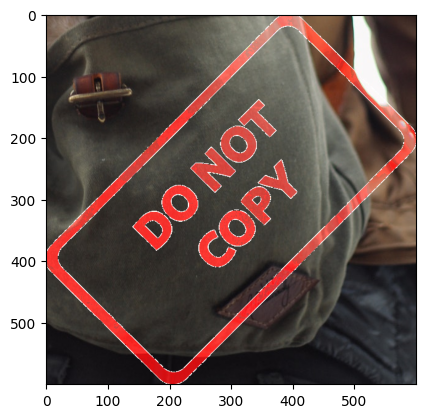

In [42]:
plt.imshow(final_roi)

In [43]:
large_img = img1
small_img = final_roi
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

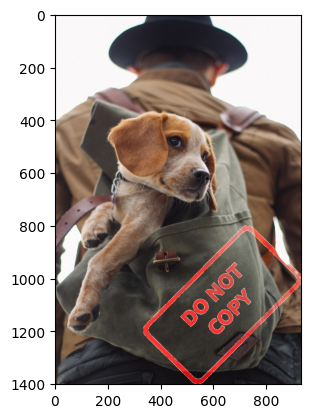

In [44]:
plt.imshow(large_img)